In [3]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
plt.rcParams['figure.figsize'] = (16,8)

We are interested in the set of portfolio's that give us the highst returns for the same amount of volatility.
  
So how do we find the highest returns?

Optimization finds the best possible of something so we are trying to find the peak of a fucntion or the minimum of the negative of the function 

$ y = (x-1)^2 + 1$

x = 1 minimizes the function


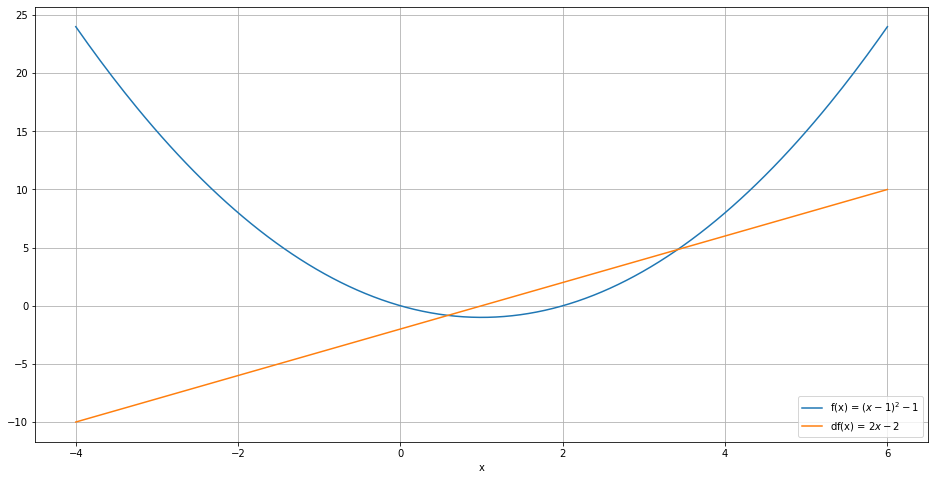

the second derivative of the function is equal to 2
this the grandient is always increasing thus dy/dx = 0 is a minima


In [9]:
x = sym.symbols('x')

# function
y = (x-1)**2 - 1
# generate x values
xx = np.linspace(-4,6,200)
# lambdify the sympy expression
fxx = sym.lambdify(x,y)
# plot x and y values
plt.plot(xx,fxx(xx), label='f(x) = $%s$' %sym.latex(y))

# differentiate the fucntion 
dy = sym.diff(y)
# solve the function
print(f'x = {sym.solve(dy)[0]} minimizes the function')
# lambdify the sympy expre
dfxx = sym.lambdify(x,dy)
plt.plot(xx,dfxx(xx), label='df(x) = $%s$' %sym.latex(dy))

plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

# take the second derivative
ddy = sym.diff(dy)
print(f"the second derivative of the function is equal to {ddy}")
print("this the grandient is always increasing thus dy/dx = 0 is a minima")

<p><p>
<img src='https://i.imgur.com/aAR1OQP.png'  style="width: 600px;">

The orange dot is the best that we can do given the constraint of x must be less than or equal to 0. 

<b>QUIZ QUESTION</b>

Let’s say we want to construct a portfolio containing 2 stocks, Stock 1 and Stock 2.

Stock 1: Expected return=15%, Volatility=10%.   
Stock 2: Expected return=10%, Volatility=5%

Correlation between Stock A and B = 0.25

What weights on Stocks 1 and 2, $x_1$ and $x_2$, will give the minimum variance portfolio?

Portfolio variance for a two asset portfolio

$ (1) \quad w_A + w_B = 1 $ 

$ (2)\quad  \sigma _{p}^{2}=w_{A}^{2}\sigma _{A}^{2}+w_{B}^{2}\sigma _{B}^{2}+2w_{A}w_{B}\sigma _{A}\sigma _{B}\rho _{AB} $

Re-arranging equation 1   
  
$ (3) \quad w_B = 1 - w_A $

Substituting $(3)$ into $(2)$:

$ (4)\quad  \sigma _{p}^{2}=w_{A}^{2}\sigma _{A}^{2}+(1 - w_A)^{2}\sigma _{B}^{2}+2w_{A}(1 - w_A)\sigma _{A}\sigma _{B}\rho _{AB} $

The optimal weight of stock 1 to give the lowest portfolio variance is 0.12 


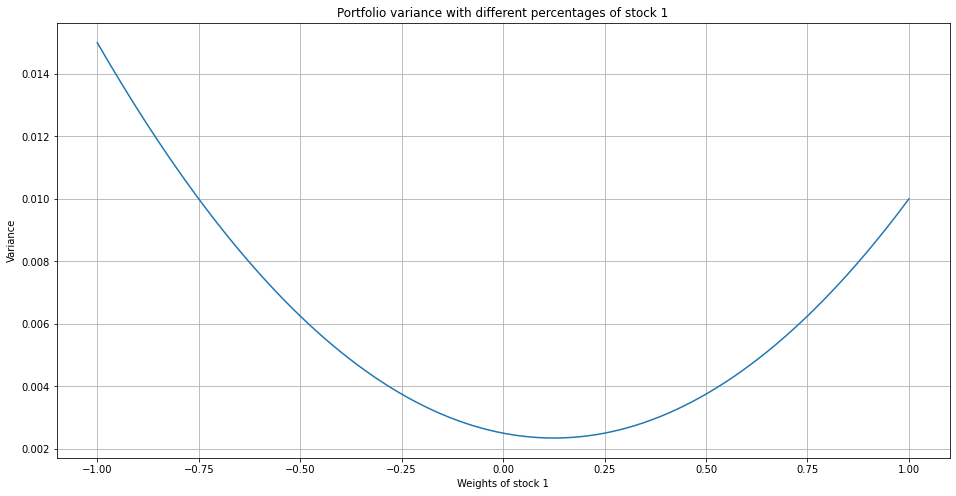

In [11]:
w = sym.symbols('w')

# values, stdev of two stocks and their correlation
sigma_A = 0.1
sigma_B = 0.05
corr = 0.25

# formula for portfolio variance dependent upon weight of stock 1
sigma_sq = w**2 * sigma_A**2 + (1 - w)**2 * sigma_B**2 + 2*w*(1-w)*sigma_A*sigma_B*corr

xx = np.linspace(-1,1,200)
fxx = sym.lambdify(w,sigma_sq)

sigma_sq_prime = sigma_sq.diff(w)
minima = sym.solve(sigma_sq_prime,w)[0]
print(f"The optimal weight of stock 1 to give the lowest portfolio variance is {minima:.2f} ")

plt.plot(xx,fxx(xx))
plt.xlabel('Weights of stock 1')
plt.ylabel("Variance")
plt.title("Portfolio variance with different percentages of stock 1")
plt.grid()
plt.show()

In [20]:
# solve y = (x-1)**2 - 1 using cvxpy subject to constraint x <= 0 

x = cvx.Variable(1)
objective = cvx.Minimize((x- 1)**2 + 1)
constraints = [x <= 0]
problem = cvx.Problem(objective, constraints)
result = problem.solve()
print(f'Optimal value of x: {x.value[0]:.6f}')
print(f'At this point the value of the function is: {problem.value:.6f}')

# solve y = (x-1)**2 - 1 using cvxpy subject to constraint to verfiy the answer above

x = cvx.Variable(1)
objective = cvx.Minimize((x- 1)**2 + 1)
problem = cvx.Problem(objective)
result = problem.solve()
print(f'\nWith no constraints: ')
print(f'Optimal value of x: {x.value[0]:.6f}')


Optimal value of x: 0.000000
At this point the value of the function is: 2.000000

With no constraints: 
Optimal value of x: 1.000000
